Seaborn Seaborn is a Python data visualization library based on matplotlib • It provides a high level interface for drawing attractive and informative statistical graphics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
cars_data=pd.read_csv('Toyota.csv',index_col=0,na_values=["??","????"])
cars_data.size

14360

In [3]:
cars_data.dropna(axis=0,inplace=True)
cars_data.size

10960

In [4]:
cars_data=pd.read_csv('Toyota.csv')
cars_data.head()

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170


In [5]:
cars_data=pd.read_csv('Toyota.csv',index_col=0)
cars_data.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170


Scatter plot Scatter plot of Price vs Age with default arguments

<Axes: xlabel='Age', ylabel='Price'>

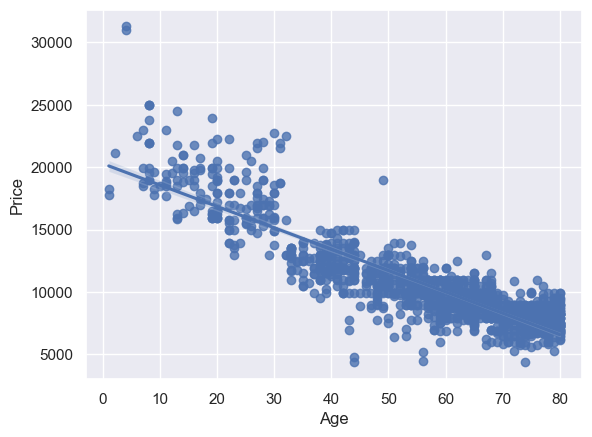

In [6]:
sns.set(style="darkgrid")
sns.regplot(x=cars_data['Age'],y=cars_data['Price'])

<Axes: xlabel='Age', ylabel='Price'>

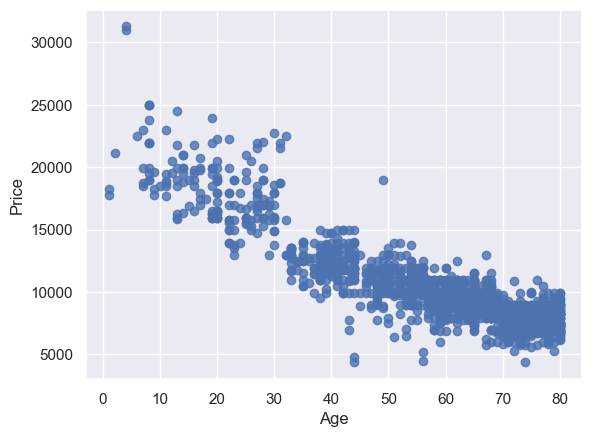

In [7]:
#Scatter plot of Price vs Age without the regression fit line
sns.regplot(x=cars_data['Age'],y=cars_data['Price'],fit_reg=False)

<Axes: xlabel='Age', ylabel='Price'>

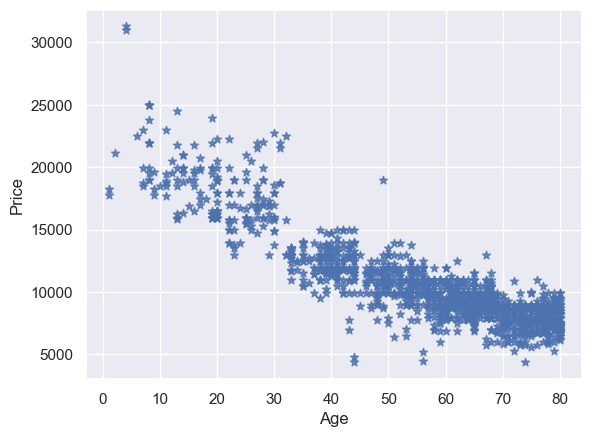

In [8]:
#Scatter plot of Price vs Age by customizing the appearance of markers
sns.regplot(x=cars_data['Age'], y=cars_data['Price'], marker="*", fit_reg=False)

C:\Users\meghna\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


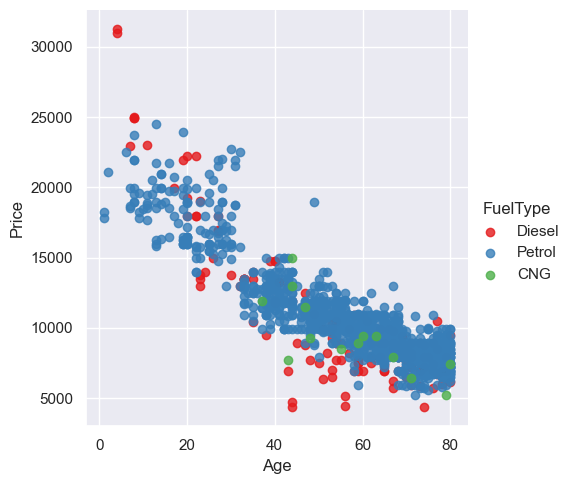

In [9]:
# Scatter plot of Price vs Age by FuelType

#Using hue parameter, including another variable to show the fuel types categories with different colors

sns.lmplot(x='Age', y='Price', data=cars_data, fit_reg=False, hue='FuelType', legend=True, palette="Set1")

Histogram¶ Histogram with default kernel density estimate

C:\Users\meghna\AppData\Local\Temp\ipykernel_16312\384205204.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

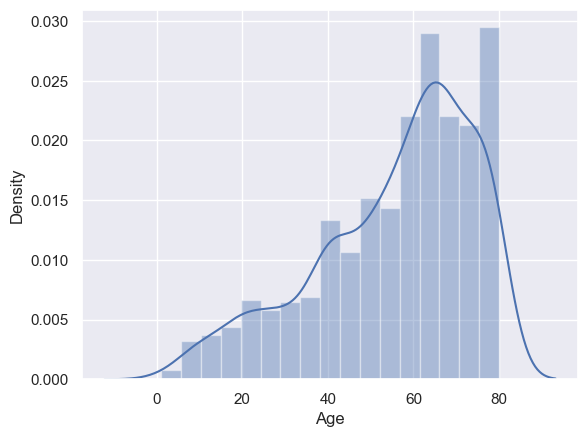

In [10]:
sns.distplot(cars_data['Age'])

C:\Users\meghna\AppData\Local\Temp\ipykernel_16312\2651435450.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars_data['Age'],kde=False)


<Axes: xlabel='Age'>

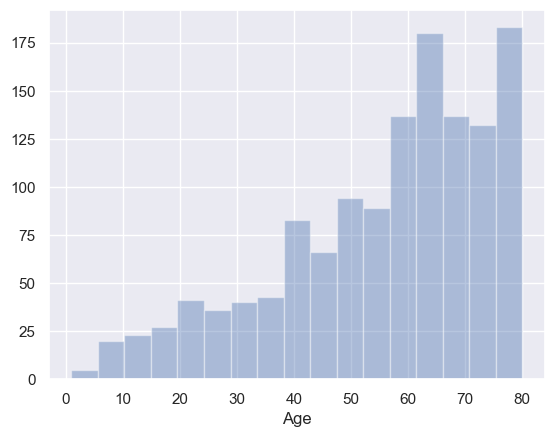

In [11]:
#Histogram without kernel density estimate
sns.distplot(cars_data['Age'],kde=False)

C:\Users\meghna\AppData\Local\Temp\ipykernel_16312\4253682675.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars_data['Age'],kde=False, bins=5)


<Axes: xlabel='Age'>

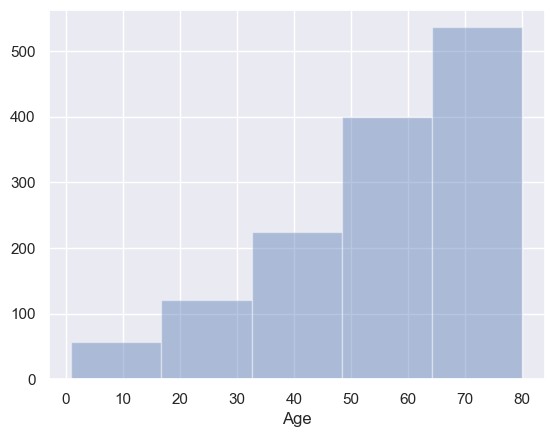

In [12]:
#Histogram with fixed no. of bins
sns.distplot(cars_data['Age'],kde=False, bins=5)

Bar plot Frequency distribution of fuel type of the cars

<Axes: xlabel='FuelType', ylabel='count'>

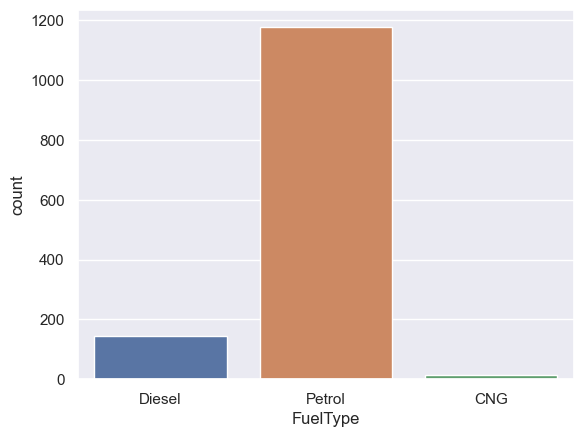

In [13]:
sns.countplot(x="FuelType", data=cars_data)

<Axes: xlabel='FuelType', ylabel='count'>

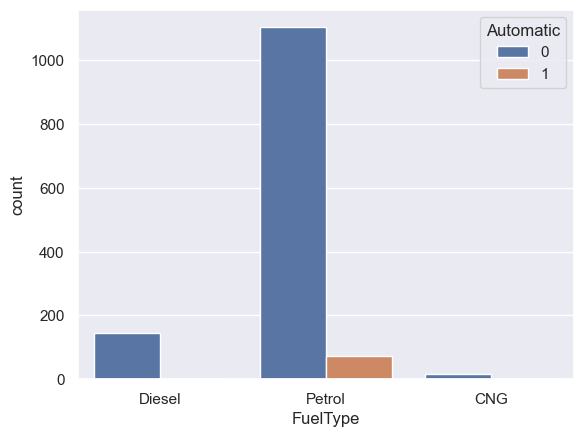

In [14]:
###Grouped bar plot
#Grouped bar plot of FuelType and Automatic

sns.countplot(x="FuelType", data=cars_data, hue="Automatic")

In [15]:
pd.crosstab(index=cars_data['Automatic'], columns=cars_data['FuelType'],dropna=True)

FuelType,CNG,Diesel,Petrol
Automatic,,,
0,15,144,1104
1,0,0,73


Box and whiskers plot  Box and whiskers plot for numerical vs categorical variable

A Box Plot is also known as Whisker plot is created to display the summary of the set of data values having properties like minimum, first quartile, median, third quartile and maximum. In the box plot, a box is created from the first quartile to the third quartile, a vertical line is also there which goes through the box at the median. Here x-axis denotes the data to be plotted while the y-axis shows the frequency distribution.

 Price of the cars for various fuel types

<Axes: xlabel='FuelType', ylabel='Price'>

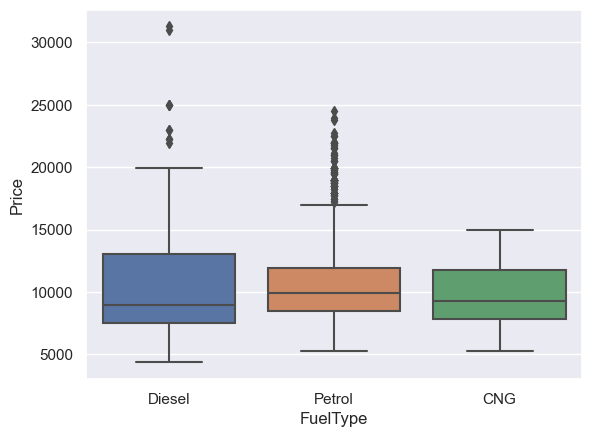

In [16]:
sns.boxplot(x=cars_data['FuelType'],y=cars_data["Price"])

Grouped box and whiskers plot  Grouped box and whiskers plot of Price vs FuelType and Automatic

<Axes: xlabel='FuelType', ylabel='Price'>

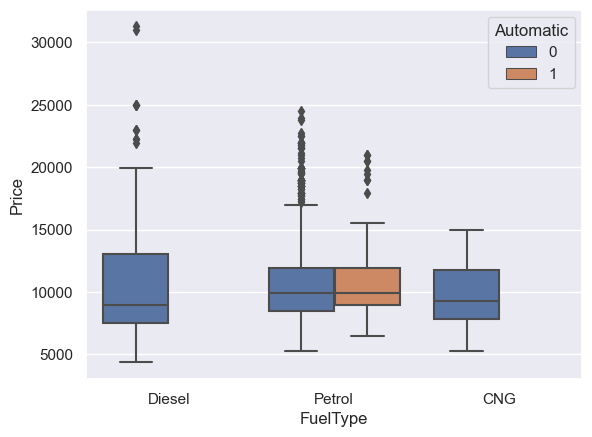

In [17]:
sns.boxplot(x="FuelType", y=cars_data["Price"],hue="Automatic",data=cars_data)

Box whiskers plot and Histogram

 Let’s plot box whiskers plot and histogram on the same window

 Split the plotting window into 2 parts

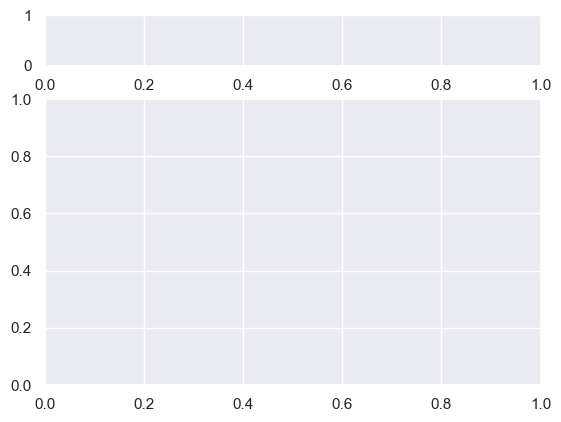

In [18]:
f,(ax_box,ax_hist)=plt.subplots(2,gridspec_kw={"height_ratios": (.15, .85)})

Now, add create two plots

C:\Users\meghna\AppData\Local\Temp\ipykernel_16312\710363015.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars_data['Price'],ax=ax_hist,kde=False)


<Axes: xlabel='Price'>

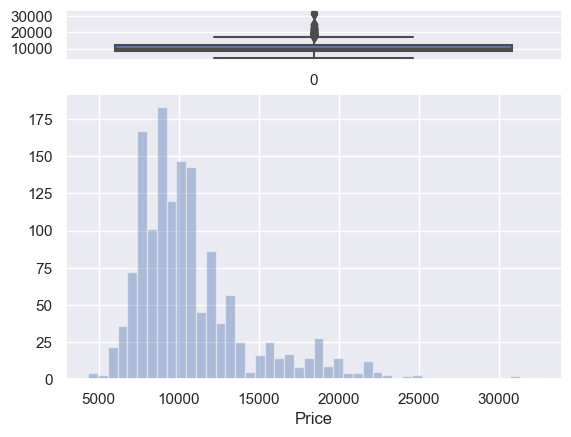

In [19]:
f,(ax_box,ax_hist)=plt.subplots(2,gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(cars_data['Price'],ax=ax_box)
sns.distplot(cars_data['Price'],ax=ax_hist,kde=False)

Pairwise plots  It is used to plot pairwise relationships in a dataset

 Creates scatterplots for joint relationships and histograms for univariate distributions

C:\Users\meghna\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  func(x=vector, **plot_kwargs)
C:\Users\meghna\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  func(x=vector, **plot_kwargs)
C:\Users\meghna\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  func(x=vector, **plot_kwargs)
C:\U

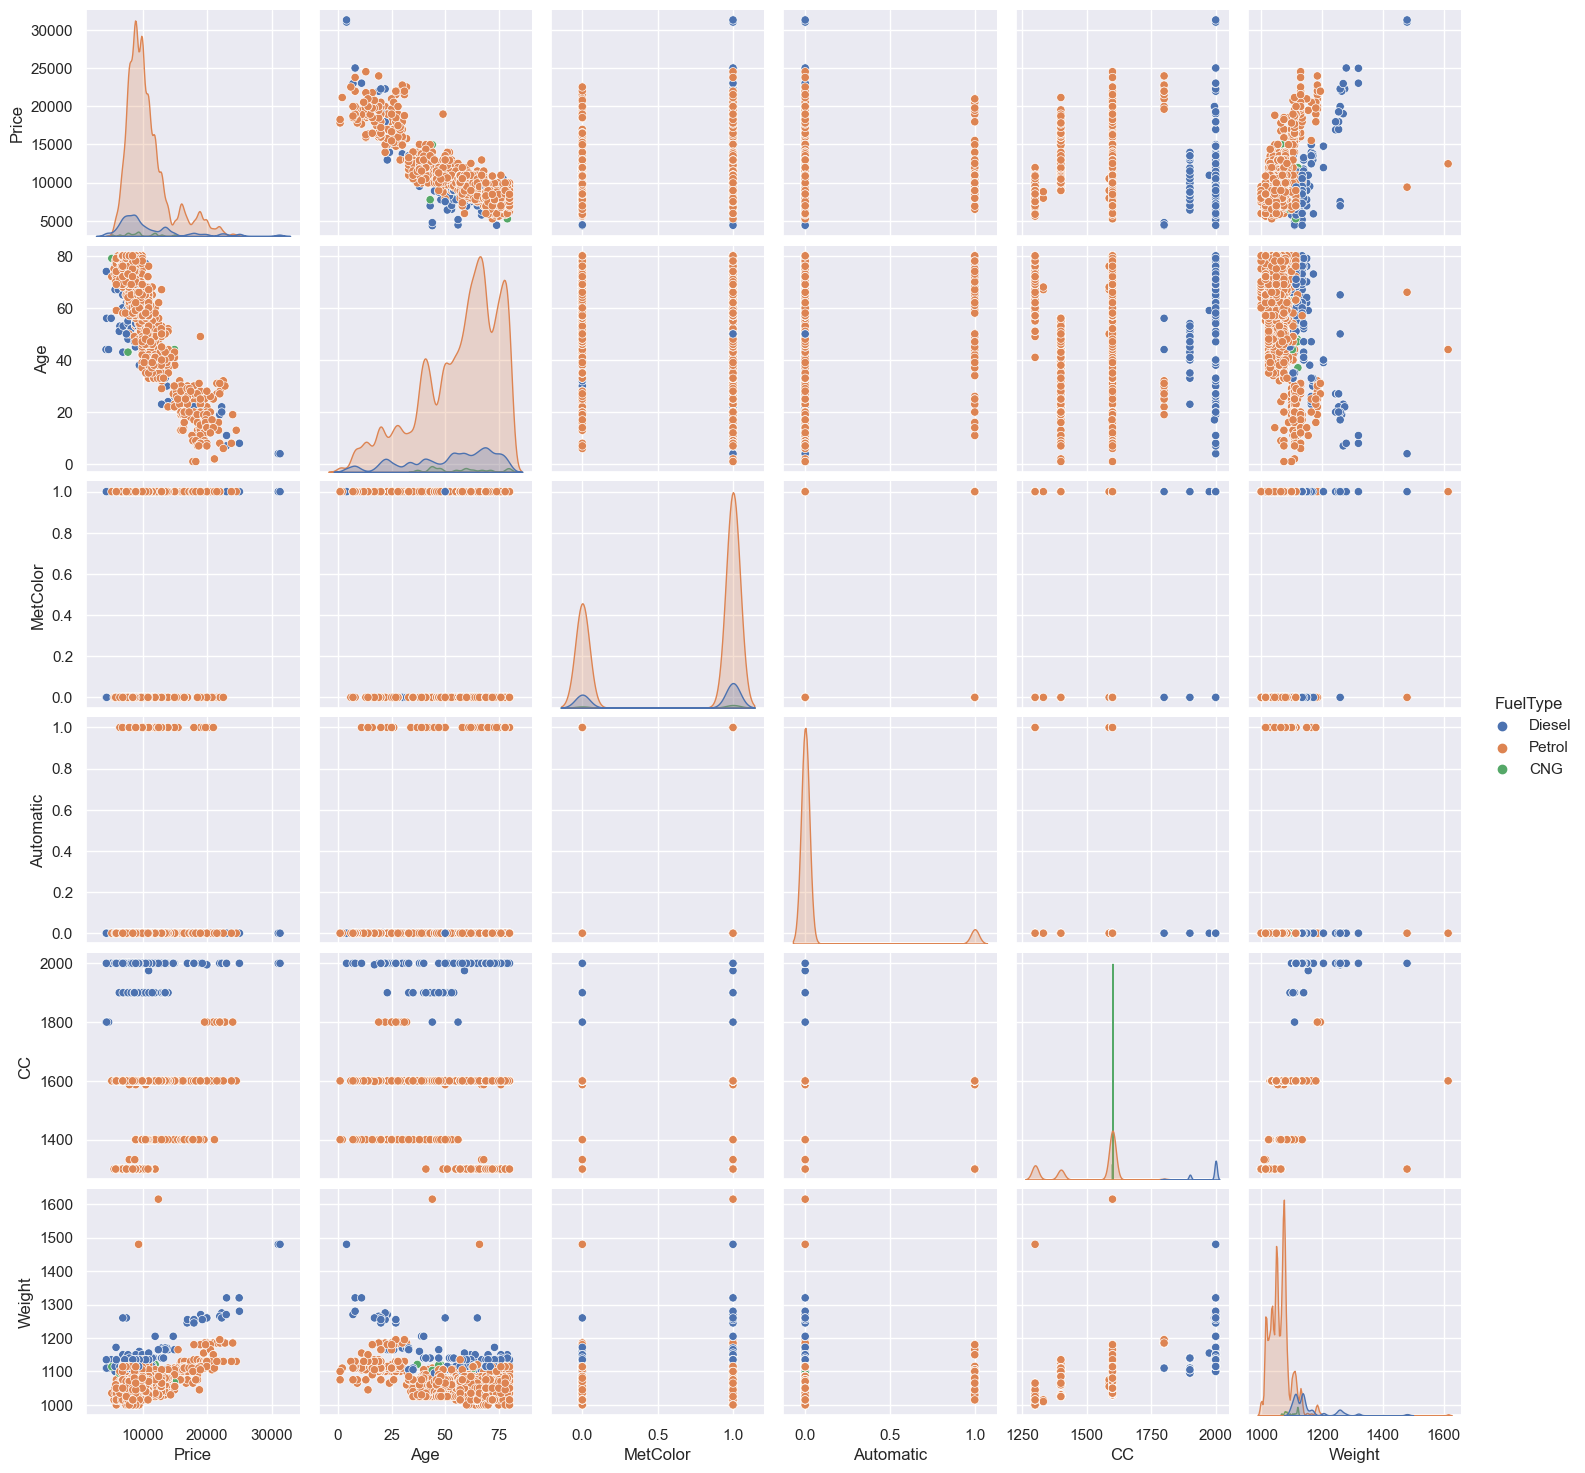

In [20]:
sns.pairplot(cars_data,kind="scatter",hue="FuelType",diag_kws={'bw': 0.1})
plt.show()

Heatmap Heatmap is defined as a graphical representation of data using colors to visualize the value of the matrix.

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [22]:
data=np.random.randint(1,100,size=(10,10))
print("The data to be plotted: \n")
print(data)

The data to be plotted: 

[[23 12 81 47 97 13 22 88 69 96]
 [36 12 28 37 89 74 66 16 42 80]
 [21 79 50 69 72 78 88 10 72 91]
 [68 68 37 18 30  8 91 99 71 38]
 [49 53 20 38 83 59 17 22 74 28]
 [84 41 26 71 28 32 50  6 49 40]
 [ 4 11 98 42 46 42 51  8 52  1]
 [32  3 36  4 49 50 47 60 86 15]
 [93  2 34 25  1  3 81 54 24 77]
 [84 86 18 74 19 66 49 85 33 59]]


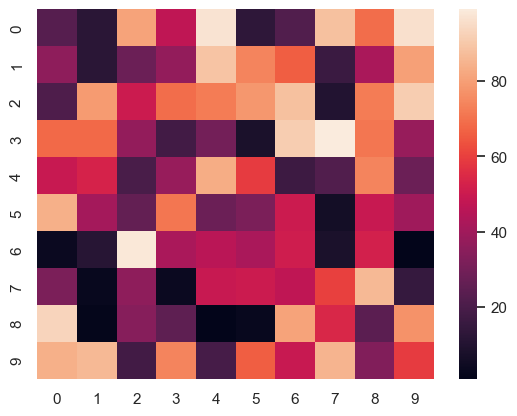

In [23]:
#Plotting Heatmap
hm=sns.heatmap(data=data)
plt.show()

If we set the vmin value to 30 and the vmax value to 70, then only the cells with values between 30 and 70 will be displayed. This is called anchoring the colormap.

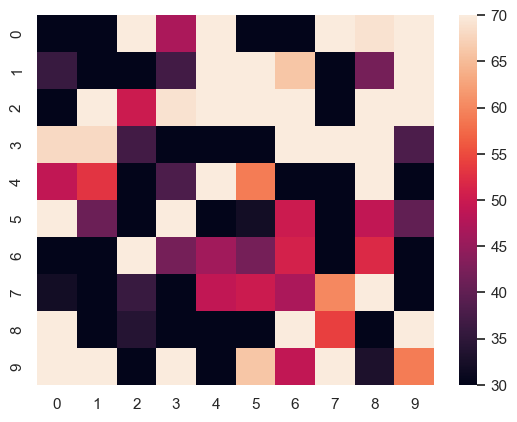

In [24]:
hm = sns.heatmap(data=data,
                vmin='30',
                vmax='70')
plt.show()

Choosing the colormap

In this, we will be looking at the cmap parameter. Matplotlib provides us with multiple colormaps, you can look at all of them here. Centering the cmap to 0 by passing the center parameter as 0.

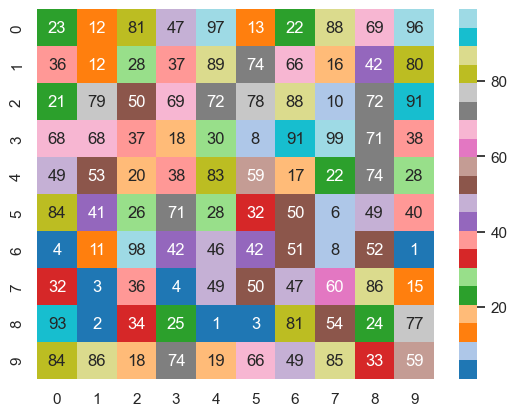

In [25]:
# setting the parameter values
cmap = "tab20"
center = 0

# setting the parameter values
annot = True

# plotting the heatmap
hm = sns.heatmap(data=data, cmap=cmap, annot=annot)



# displaying the plotted heatmap
plt.show()